## Importing all necessary Libraries

In [1]:
# Data manipulation
import numpy as np
import pandas as pd

# Visualization and plotting
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

## Data preparation & preprocessing.

In [2]:
df = pd.read_csv("bank_data_C.csv")


In [3]:
df.head(5)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [4]:
df.describe(include = "all")

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
count,1041614,1041614,1041614,1041614,1041614,1.041614e+06,1041614,1.041614e+06,1.041614e+06
unique,1041614,879358,17233,3,9275,NaN,55,NaN,NaN
top,T1,C5533885,1/1/1800,M,MUMBAI,NaN,7/8/16,NaN,NaN
freq,1,6,56292,760978,101997,NaN,27084,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.149986e+05,NaN,1.571221e+05,1.566096e+03
std,NaN,NaN,NaN,NaN,NaN,8.467609e+05,NaN,5.126352e+04,6.561464e+03
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,4.728140e+03,NaN,1.240410e+05,1.600000e+02
50%,NaN,NaN,NaN,NaN,NaN,1.676852e+04,NaN,1.642470e+05,4.575000e+02
75%,NaN,NaN,NaN,NaN,NaN,5.742885e+04,NaN,2.000220e+05,1.200000e+03


In [5]:
df.isnull().sum()

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041614 entries, 0 to 1041613
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1041614 non-null  object 
 1   CustomerID               1041614 non-null  object 
 2   CustomerDOB              1041614 non-null  object 
 3   CustGender               1041614 non-null  object 
 4   CustLocation             1041614 non-null  object 
 5   CustAccountBalance       1041614 non-null  float64
 6   TransactionDate          1041614 non-null  object 
 7   TransactionTime          1041614 non-null  int64  
 8   TransactionAmount (INR)  1041614 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 71.5+ MB


## Convert data with wrong data types

In [7]:
df["CustomerDOB"] = pd.to_datetime(df["CustomerDOB"], dayfirst=True)
df["TransactionDate"] = pd.to_datetime(df["TransactionDate"], dayfirst=True)

In [8]:
df.head(5)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0
3,T4,C5342380,2073-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041614 entries, 0 to 1041613
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   TransactionID            1041614 non-null  object        
 1   CustomerID               1041614 non-null  object        
 2   CustomerDOB              1041614 non-null  datetime64[ns]
 3   CustGender               1041614 non-null  object        
 4   CustLocation             1041614 non-null  object        
 5   CustAccountBalance       1041614 non-null  float64       
 6   TransactionDate          1041614 non-null  datetime64[ns]
 7   TransactionTime          1041614 non-null  int64         
 8   TransactionAmount (INR)  1041614 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 71.5+ MB


In [10]:
df["TransactionDate"].unique()

array(['2016-08-02T00:00:00.000000000', '2016-08-01T00:00:00.000000000',
       '2016-08-03T00:00:00.000000000', '2016-08-05T00:00:00.000000000',
       '2016-08-04T00:00:00.000000000', '2016-08-06T00:00:00.000000000',
       '2016-08-09T00:00:00.000000000', '2016-08-08T00:00:00.000000000',
       '2016-08-12T00:00:00.000000000', '2016-08-07T00:00:00.000000000',
       '2016-10-21T00:00:00.000000000', '2016-10-16T00:00:00.000000000',
       '2016-08-10T00:00:00.000000000', '2016-08-14T00:00:00.000000000',
       '2016-08-17T00:00:00.000000000', '2016-08-21T00:00:00.000000000',
       '2016-08-19T00:00:00.000000000', '2016-08-24T00:00:00.000000000',
       '2016-08-22T00:00:00.000000000', '2016-08-29T00:00:00.000000000',
       '2016-08-31T00:00:00.000000000', '2016-09-22T00:00:00.000000000',
       '2016-09-23T00:00:00.000000000', '2016-08-13T00:00:00.000000000',
       '2016-08-25T00:00:00.000000000', '2016-08-28T00:00:00.000000000',
       '2016-08-15T00:00:00.000000000', '2016-08-27

In [11]:
df["CustomerDOB"].unique()

array(['1994-01-10T00:00:00.000000000', '2057-04-04T00:00:00.000000000',
       '1996-11-26T00:00:00.000000000', ...,
       '2065-07-18T00:00:00.000000000', '2042-05-15T00:00:00.000000000',
       '2044-10-24T00:00:00.000000000'], dtype='datetime64[ns]')

In [47]:
def calculate_age(df):
    # Subtract year of birth from transaction year
    df["Age"] = df["TransactionDate"].dt.year - df["CustomerDOB"].dt.year
    return df

In [49]:
df = calculate_age(df)
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),age,Age
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,22,22
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,59,59
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,20,20
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,43,43
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,28,28


## Observe and correct customer with negative age values

In [14]:
df[df["age"] <= 0]["CustomerDOB"]

1         2057-04-04
3         2073-09-14
5         2072-10-08
15        2068-07-10
29        2067-01-21
             ...    
1041553   2070-09-20
1041557   2048-07-15
1041583   2033-10-05
1041591   2071-10-05
1041599   2071-08-21
Name: CustomerDOB, Length: 104836, dtype: datetime64[ns]

In [15]:
def adjust_year(date):
    if pd.notnull(date) and date.year > 2016:
        return date.replace(year=date.year - 100)
    return date

In [16]:
df["CustomerDOB"] = df["CustomerDOB"].apply(adjust_year)

In [17]:
df = calculate_age(df)
df.head(5)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),age
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,22
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,59
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,20
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,43
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,28


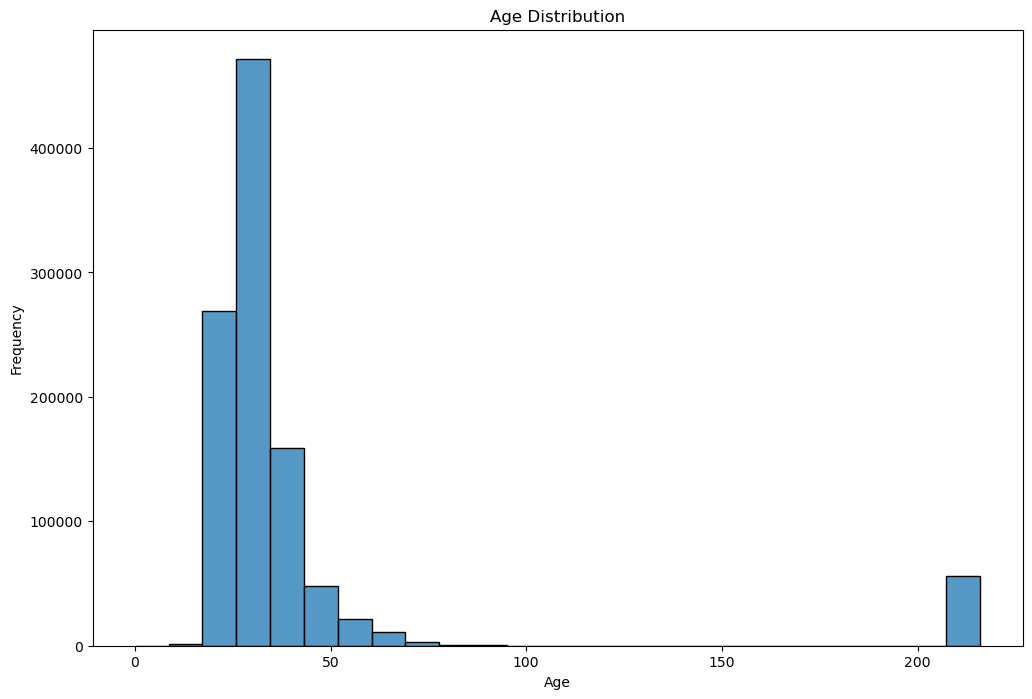

In [18]:
# Plotting Age Distribution
plt.figure(figsize=(12, 8))
sns.histplot(df["age"], bins=25, kde=False)
plt.xlabel("Age")           # <-- corrected from zlabel to xlabel
plt.ylabel("Frequency")     
plt.title("Age Distribution")
plt.show()

In [19]:
df[df["Age"] > 100]["CustomerDOB"]

16        1800-01-01
22        1800-01-01
28        1800-01-01
34        1800-01-01
150       1800-01-01
             ...    
1041491   1800-01-01
1041500   1800-01-01
1041578   1800-01-01
1041580   1800-01-01
1041587   1800-01-01
Name: CustomerDOB, Length: 56292, dtype: datetime64[ns]

In [20]:
df[df["Age"] > 100]["CustomerDOB"].unique()

array(['1800-01-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [21]:
def replace_age_outlier(df):
    DOB_threshold = 1900

    # Find rows where year of birth is less than the threshold
    age_outliers = df[df["CustomerDOB"].dt.year < DOB_threshold].index

    # Calculate the mean of valid DOBs
    mean_DOB = df.loc[~df.index.isin(age_outliers), "CustomerDOB"].mean()

    # Replace outlier DOBs with the mean DOB
    df.loc[age_outliers, "CustomerDOB"] = mean_DOB

    return df

In [22]:
# Fix any age outliers
df = replace_age_outlier(df)

# Recalculate age after fixing DOBs
df = calculate_age(df)

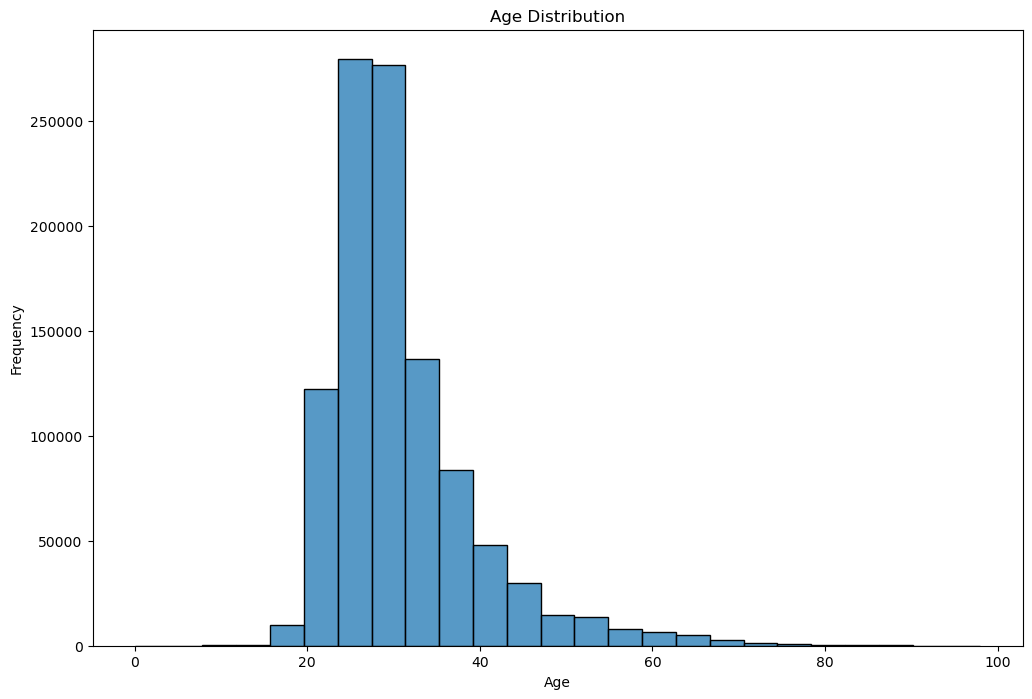

In [23]:
# Plotting Age Distribution
plt.figure(figsize=(12, 8))
sns.histplot(df["Age"], bins=25, kde=False)
plt.xlabel("Age")           
plt.ylabel("Frequency")     
plt.title("Age Distribution")
plt.show()

## Gender

In [24]:
df["CustGender"].value_counts()

M    760978
F    280635
T         1
Name: CustGender, dtype: int64

In [44]:
df["CustGender"] = df["CustGender"].replace('T','F')

In [45]:
df["CustGender"].value_counts()

M    760311
F    280483
Name: CustGender, dtype: int64

## Location

In [27]:
df["CustLocation"].value_counts()

MUMBAI                            101997
NEW DELHI                          84143
BANGALORE                          81330
GURGAON                            73594
DELHI                              70549
                                   ...  
DISTRICT PURI                          1
DHAKOLA                                1
KANDESHWAR STATION NAVI MUMBAI         1
HOSHIAR PUR                            1
IMPERIA THANE WEST                     1
Name: CustLocation, Length: 9275, dtype: int64

## Account Balance

In [28]:
df["CustAccountBalance"].sort_values(ascending = True)

133809             0.0
1017262            0.0
665191             0.0
631012             0.0
242176             0.0
              ...     
995329     115035495.1
40727      115035495.1
994478     115035495.1
829903     115035495.1
873636     115035495.1
Name: CustAccountBalance, Length: 1041614, dtype: float64

## Transaction Amount

In [29]:
df["TransactionAmount (INR)"].sort_values(ascending = True)

308944          0.00
746400          0.00
746393          0.00
684462          0.00
746124          0.00
             ...    
56155      720001.16
744124     724122.00
528263     991132.22
574916    1380002.88
396280    1560034.99
Name: TransactionAmount (INR), Length: 1041614, dtype: float64

In [30]:
(df["TransactionAmount (INR)"] == 0).sum()


820

In [31]:
df.drop(df[df["TransactionAmount (INR)"] == 0].index, axis=0, inplace=True)

In [32]:
(df["TransactionAmount (INR)"] == 0).sum()

0

In [33]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),age
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,22
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,59
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,20
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,43
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,28


## Exploratory Data Analysis

In [37]:
df["CustomerID"].unique()

array(['C5841053', 'C2142763', 'C4417068', ..., 'C8020229', 'C6459278',
       'C6420483'], dtype=object)

In [36]:
df.shape

(1040794, 10)

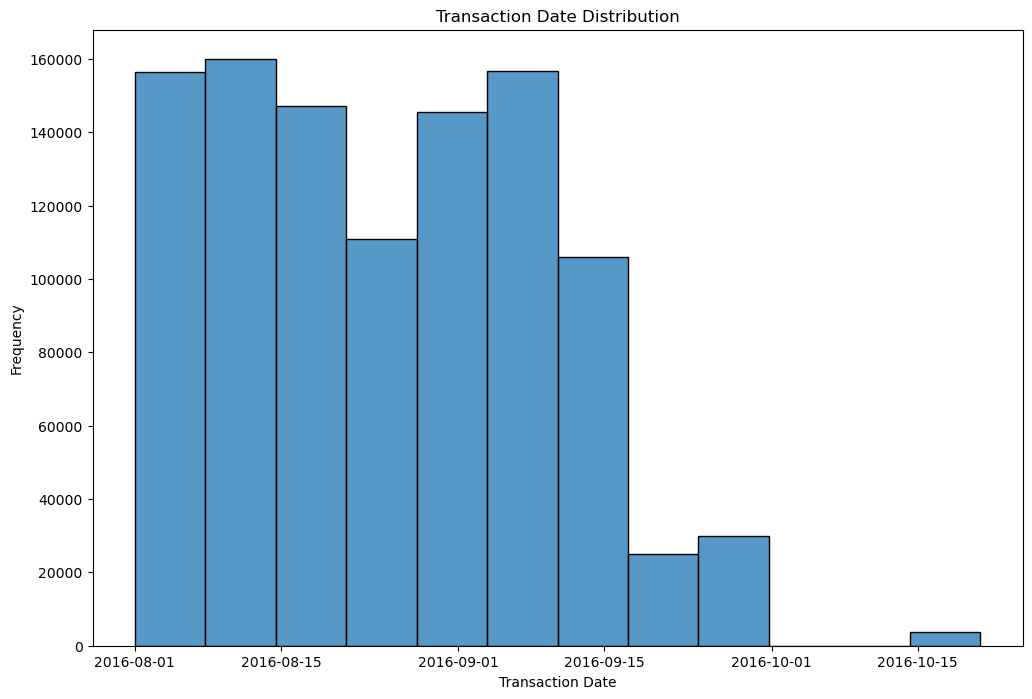

In [38]:
#plot a distribution for data across the uniquetransaction date
plt.figure(figsize=(12, 8))
sns.histplot(df["TransactionDate"], bins=12, kde = False)
plt.xlabel("Transaction Date")           
plt.ylabel("Frequency")     
plt.title("Transaction Date Distribution")
plt.show()

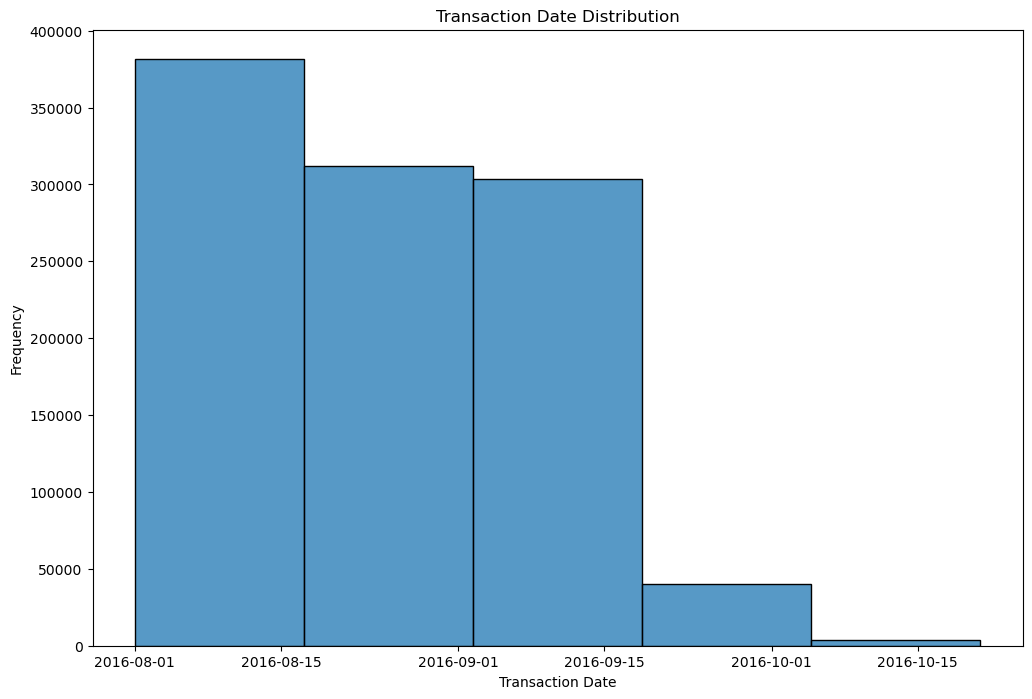

In [40]:
#plot a distribution for data across the uniquetransaction date
plt.figure(figsize=(12, 8))
sns.histplot(df["TransactionDate"], bins=5, kde = False)
plt.xlabel("Transaction Date")           
plt.ylabel("Frequency")     
plt.title("Transaction Date Distribution")
plt.show()

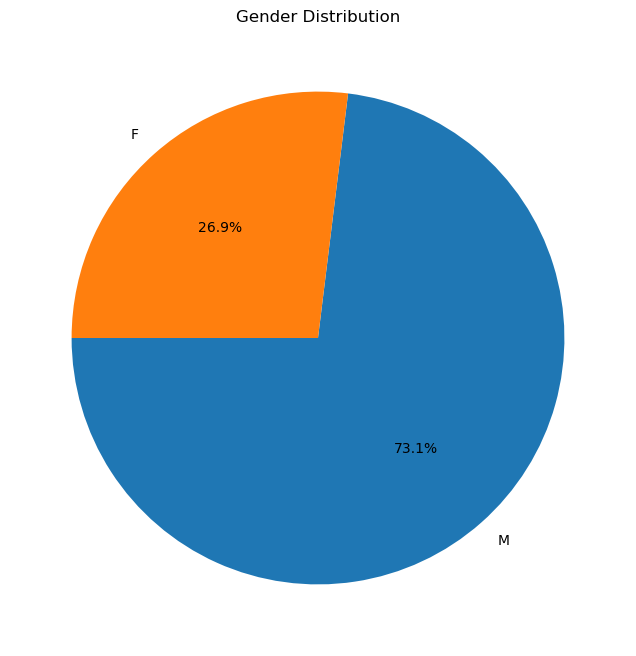

In [46]:

# Count the occurrences of each gender
gender_count = df['CustGender'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    gender_count,
    labels=gender_count.index,
    autopct='%1.1f%%',
    startangle=180
)
plt.title("Gender Distribution")
plt.ylabel('')  # Optional: removes the default y-axis label
plt.show()

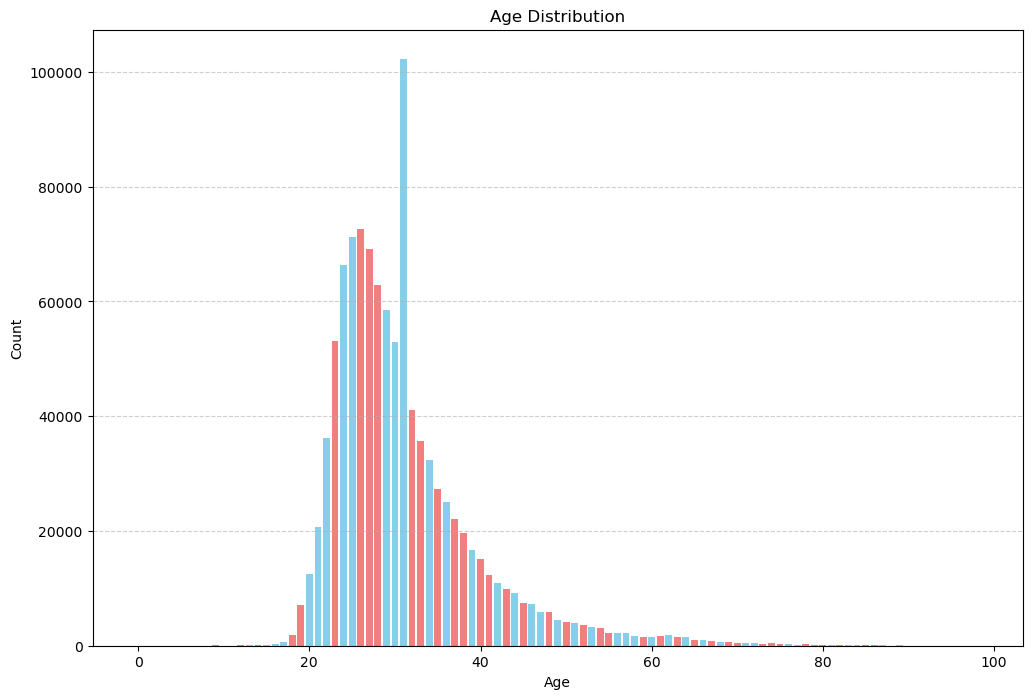

In [61]:

age_count = df['Age'].value_counts()

# Create a bar chart
plt.figure(figsize=(12, 8))
plt.bar(gender_count.index, age_count.values, color=['skyblue', 'lightcoral'])
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


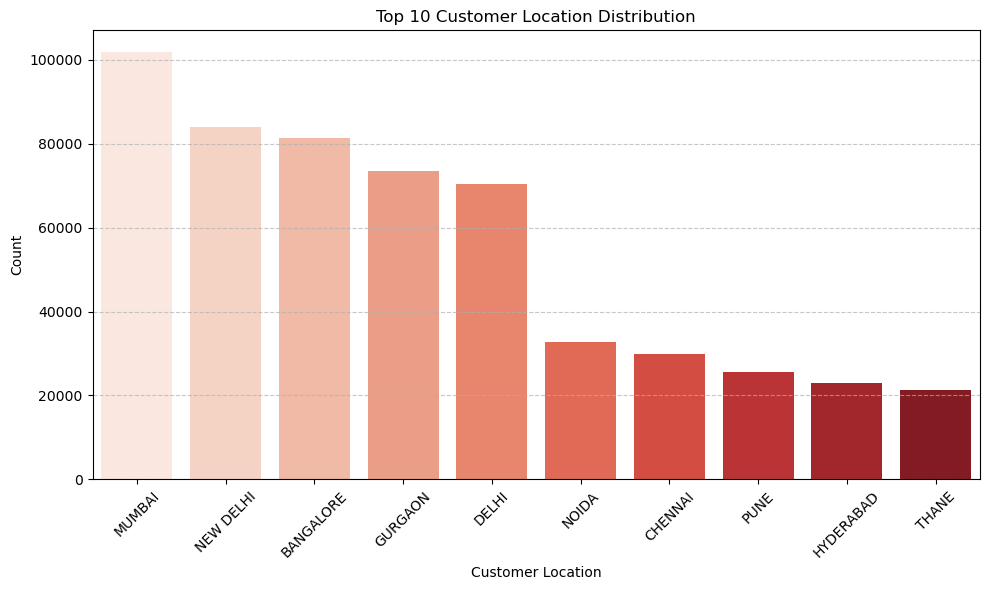

In [103]:
location_count = df['CustLocation'].value_counts().reset_index()
location_count.columns = ['CustLocation', 'Count']

# Filter to only include top N locations (e.g., top 10 locations)
top_n = 10
top_location_count = location_count.head(top_n)

# Create a bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='CustLocation', y='Count', data=top_location_count, palette='Reds')

# Add labels and title
plt.title(f"Top {top_n} Customer Location Distribution", fontweight ='bold')
plt.xlabel("Customer Location", fontweight ='bold')
plt.ylabel("Count", fontweight ='bold')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


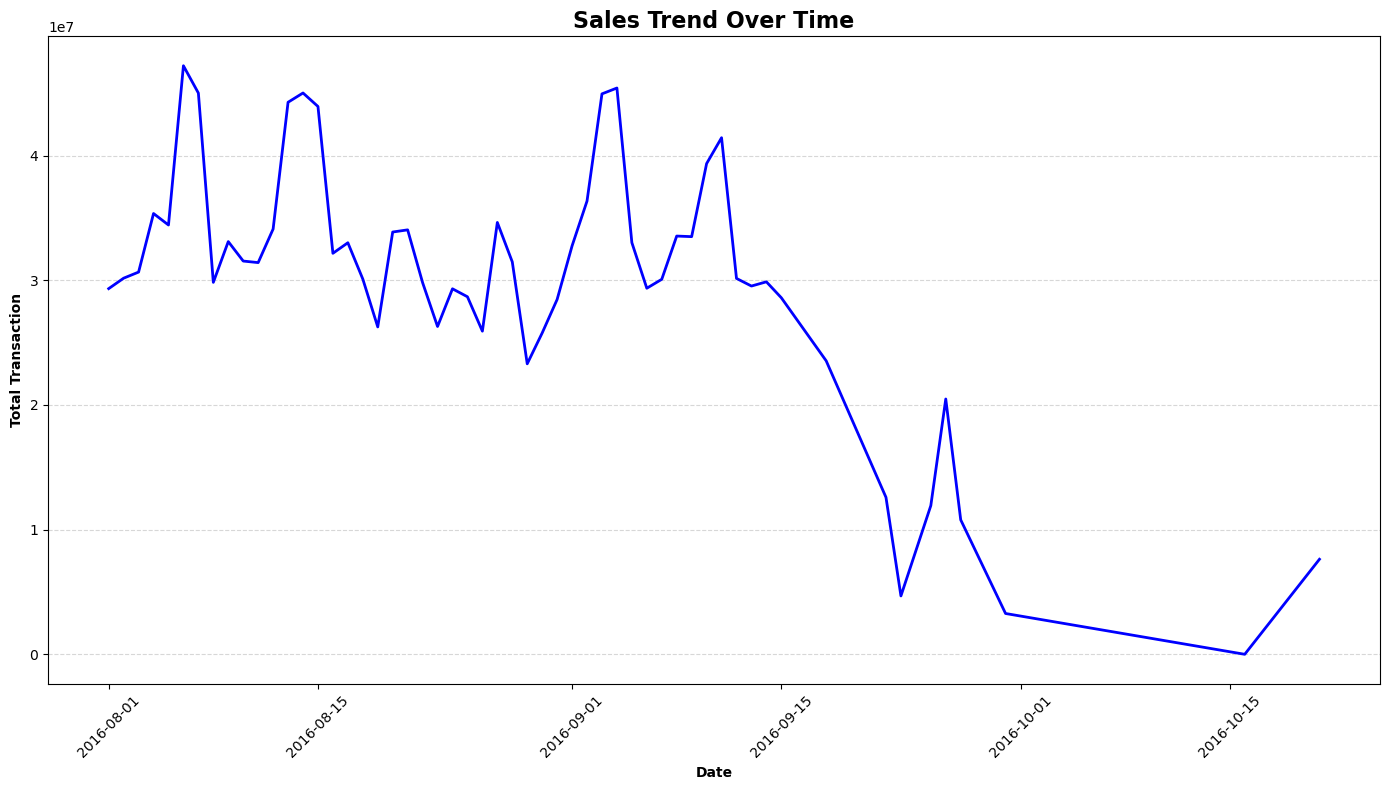

In [155]:
daily_sales = df.groupby('TransactionDate')['TransactionAmount (INR)'].sum().reset_index()

# Convert datetime to just the date (optional, for cleaner x-axis)
daily_sales['TransactionDate'] = daily_sales['TransactionDate'].dt.date

# Plot line chart
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=daily_sales,
    x='TransactionDate',
    y='TransactionAmount (INR)',
    color='Blue',
    linewidth=2
)

# Titles and labels
plt.title("Sales Trend Over Time", fontsize=16, fontweight ='bold')
plt.xlabel("Date", fontweight = 'bold')
plt.ylabel("Total Transaction", fontweight ='bold')

# Improve x-axis label readability
plt.xticks(rotation=45)

# Optional: Add grid and layout tweaks
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


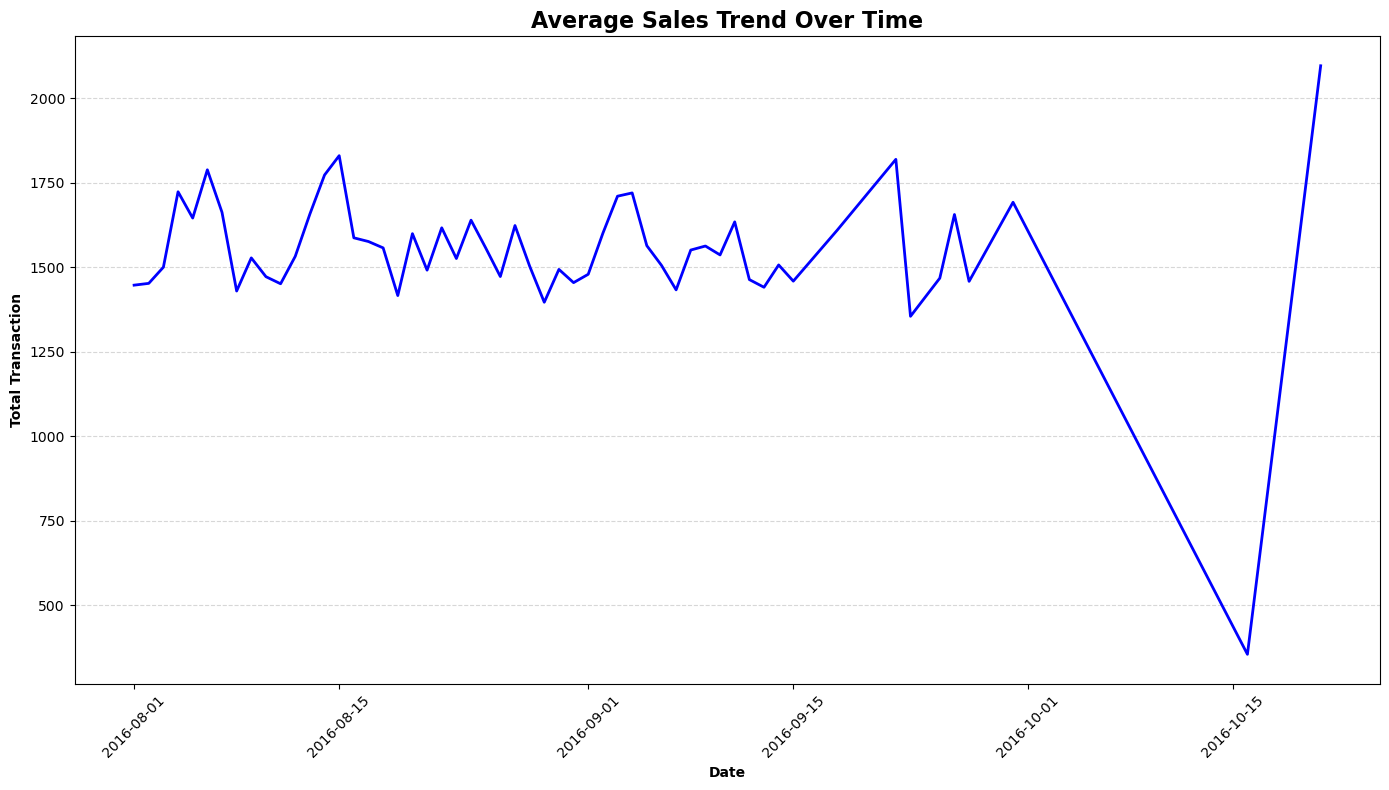

In [168]:
daily_sales = df.groupby('TransactionDate')['TransactionAmount (INR)'].mean().reset_index()

# Convert datetime to just the date (optional, for cleaner x-axis)
daily_sales['TransactionDate'] = daily_sales['TransactionDate'].dt.date

# Plot line chart
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=daily_sales,
    x='TransactionDate',
    y='TransactionAmount (INR)',
    color='Blue',
    linewidth=2
)

# Titles and labels
plt.title("Average Sales Trend Over Time", fontsize=16, fontweight ='bold')
plt.xlabel("Date", fontweight = 'bold')
plt.ylabel("Total Transaction", fontweight ='bold')

# Improve x-axis label readability
plt.xticks(rotation=45)

# Optional: Add grid and layout tweaks
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

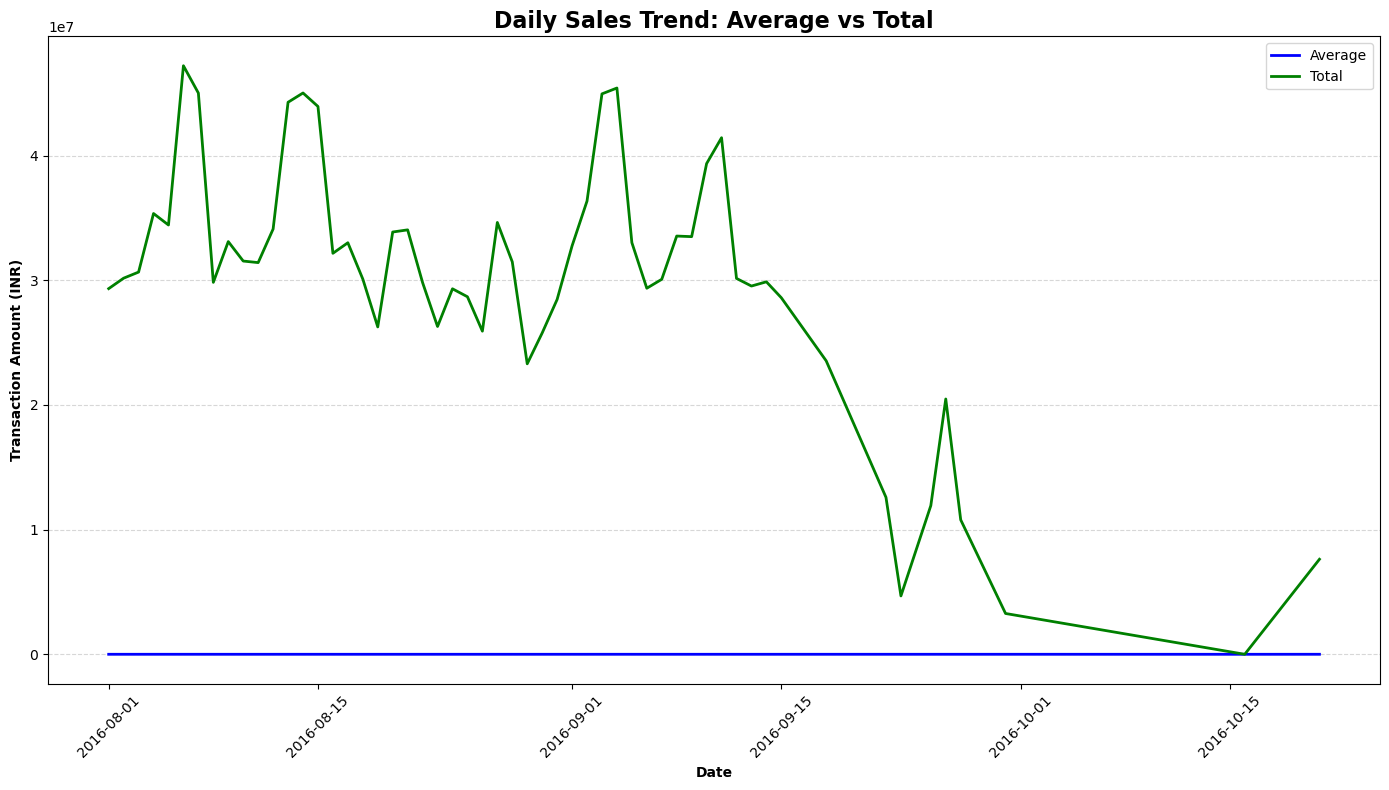

In [169]:

# Group by date for average and total transaction amounts
daily_avg = df.groupby('TransactionDate')['TransactionAmount (INR)'].mean().reset_index()
daily_total = df.groupby('TransactionDate')['TransactionAmount (INR)'].sum().reset_index()

# Convert datetime to date for cleaner x-axis
daily_avg['TransactionDate'] = daily_avg['TransactionDate'].dt.date
daily_total['TransactionDate'] = daily_total['TransactionDate'].dt.date

# Plot both lines
plt.figure(figsize=(14, 8))

# Average transaction amount line
sns.lineplot(data=daily_avg, x='TransactionDate', y='TransactionAmount (INR)', label='Average', color='blue', linewidth=2)

# Total transaction amount line
sns.lineplot(data=daily_total, x='TransactionDate', y='TransactionAmount (INR)', label='Total', color='green', linewidth=2)

# Chart formatting
plt.title("Daily Sales Trend: Average vs Total", fontsize=16, fontweight='bold')
plt.xlabel("Date", fontweight='bold')
plt.ylabel("Transaction Amount (INR)", fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


In [170]:
print(daily_avg.head())  # Check the first few rows of the daily average


  TransactionDate  TransactionAmount (INR)
0      2016-08-01              1447.303955
1      2016-08-02              1452.592967
2      2016-08-03              1500.456477
3      2016-08-04              1723.494518
4      2016-08-05              1645.703922


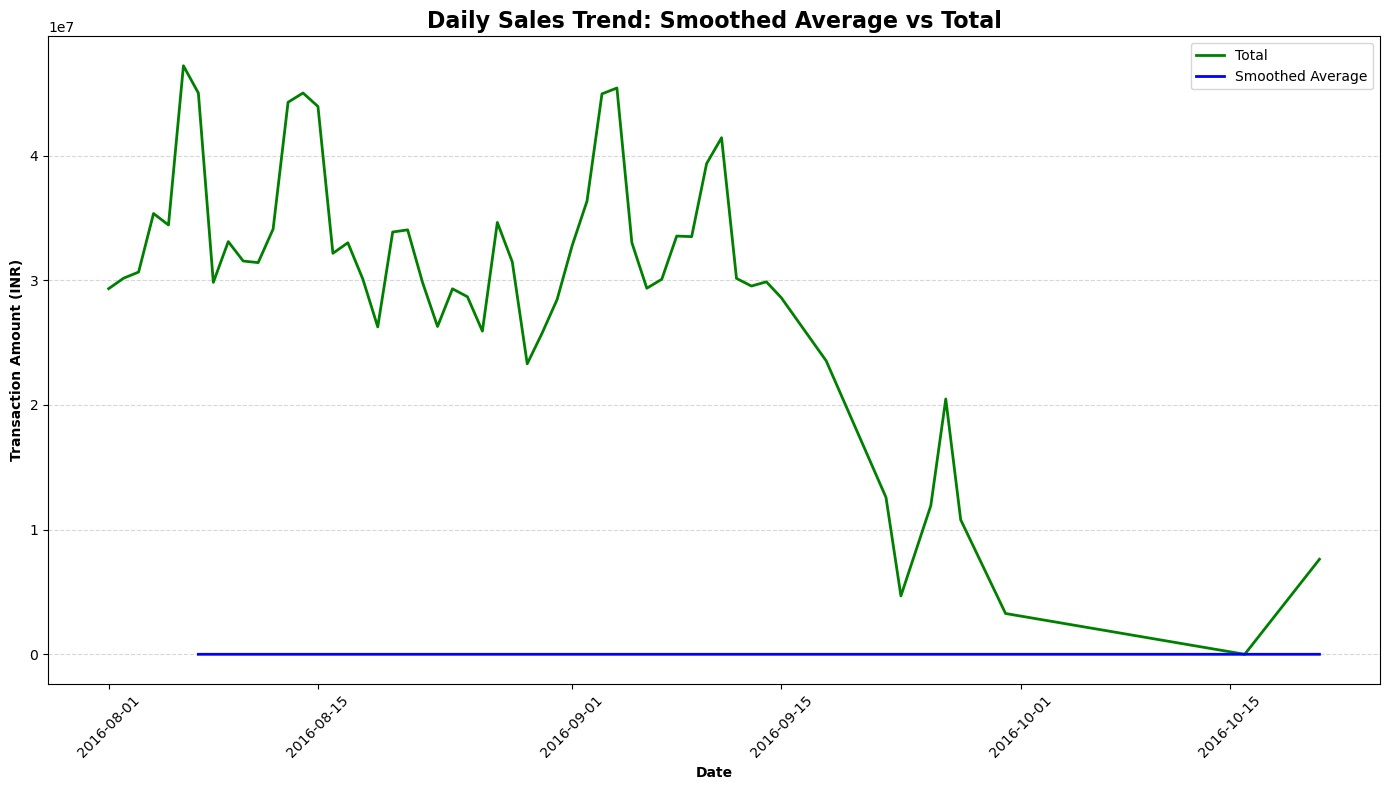

In [171]:
# Adding a 7-day rolling average to smooth the average line (adjust the window size as necessary)
daily_avg['RollingAvg'] = daily_avg['TransactionAmount (INR)'].rolling(window=7).mean()

# Plot both lines: Total and Smoothed Average
plt.figure(figsize=(14, 8))

# Total transaction amount line
sns.lineplot(data=daily_total, x='TransactionDate', y='TransactionAmount (INR)', label='Total', color='green', linewidth=2)

# Smoothed Average transaction amount line
sns.lineplot(data=daily_avg, x='TransactionDate', y='RollingAvg', label='Smoothed Average', color='blue', linewidth=2)

# Chart formatting
plt.title("Daily Sales Trend: Smoothed Average vs Total", fontsize=16, fontweight='bold')
plt.xlabel("Date", fontweight='bold')
plt.ylabel("Transaction Amount (INR)", fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


TypeError: Invalid object type at position 0

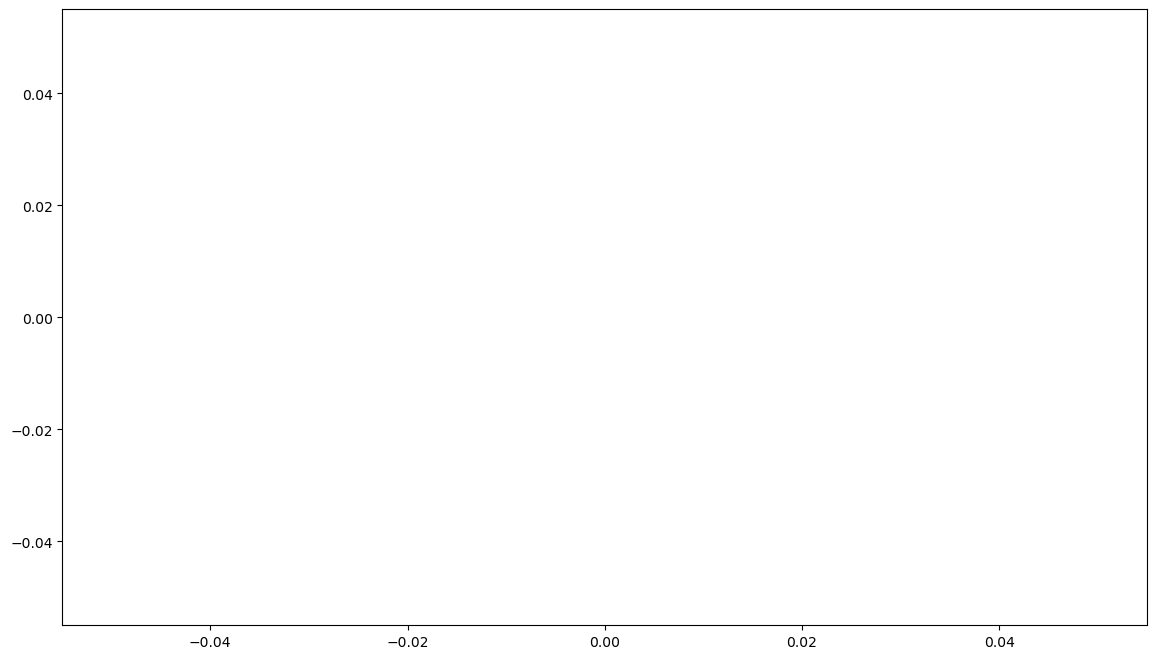

In [172]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract month-year from the transaction date for grouping
df['MonthYear'] = df['TransactionDate'].dt.to_period('M')

# Group by month and calculate total and average transaction amount
monthly_avg = df.groupby('MonthYear')['TransactionAmount (INR)'].mean().reset_index()
monthly_total = df.groupby('MonthYear')['TransactionAmount (INR)'].sum().reset_index()

# Plot both lines: Total and Average transaction amounts
plt.figure(figsize=(14, 8))

# Total transaction amount line
sns.lineplot(data=monthly_total, x='MonthYear', y='TransactionAmount (INR)', label='Total Transaction Amount', color='green', linewidth=2)

# Average transaction amount line
sns.lineplot(data=monthly_avg, x='MonthYear', y='TransactionAmount (INR)', label='Average Transaction Amount', color='blue', linewidth=2)

# Titles and labels
plt.title("Monthly Sales Trend: Average vs Total Transaction Amount", fontsize=16, fontweight='bold')
plt.xlabel("Month", fontweight='bold')
plt.ylabel("Transaction Amount (INR)", fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


TypeError: Invalid object type at position 0

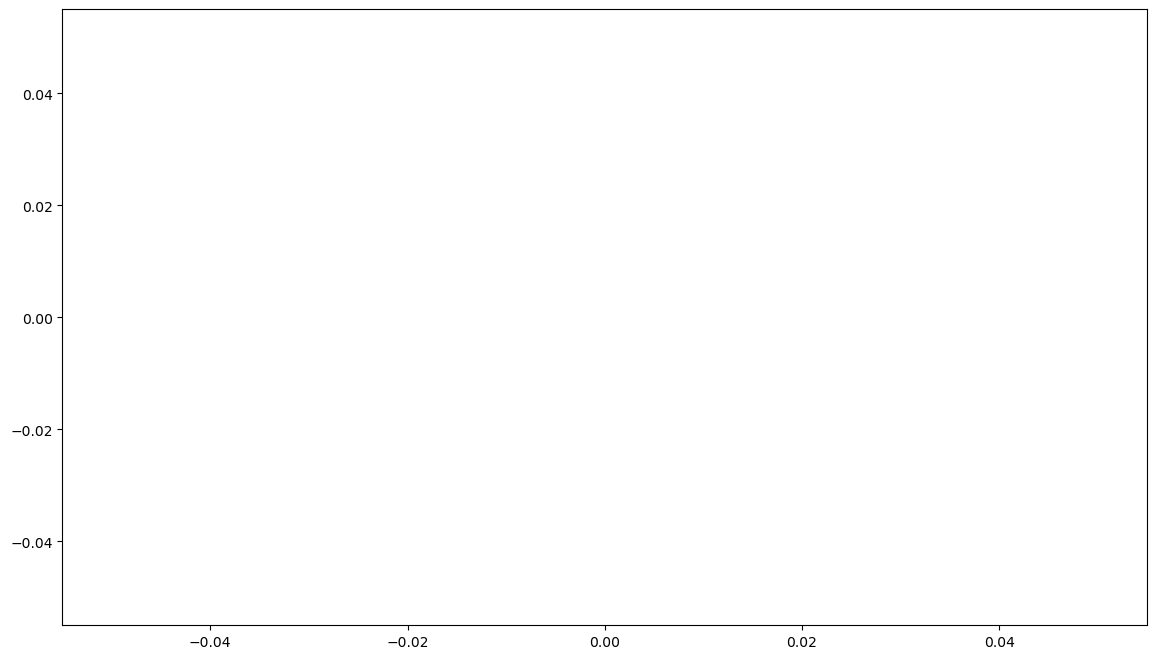

In [173]:
# Ensure 'TransactionAmount (INR)' is numeric
df['TransactionAmount (INR)'] = pd.to_numeric(df['TransactionAmount (INR)'], errors='coerce')

# Extract month-year from the transaction date for grouping
df['MonthYear'] = df['TransactionDate'].dt.to_period('M')

# Group by month and calculate total and average transaction amount
monthly_avg = df.groupby('MonthYear')['TransactionAmount (INR)'].mean().reset_index()
monthly_total = df.groupby('MonthYear')['TransactionAmount (INR)'].sum().reset_index()

# Plot both lines: Total and Average transaction amounts
plt.figure(figsize=(14, 8))

# Total transaction amount line
sns.lineplot(data=monthly_total, x='MonthYear', y='TransactionAmount (INR)', label='Total Transaction Amount', color='green', linewidth=2)

# Average transaction amount line
sns.lineplot(data=monthly_avg, x='MonthYear', y='TransactionAmount (INR)', label='Average Transaction Amount', color='blue', linewidth=2)

# Titles and labels
plt.title("Monthly Sales Trend: Average vs Total Transaction Amount", fontsize=16, fontweight='bold')
plt.xlabel("Month", fontweight='bold')
plt.ylabel("Transaction Amount (INR)", fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


In [104]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),age,Age
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,22,22
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,59,59
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,20,20
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,43,43
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,28,28


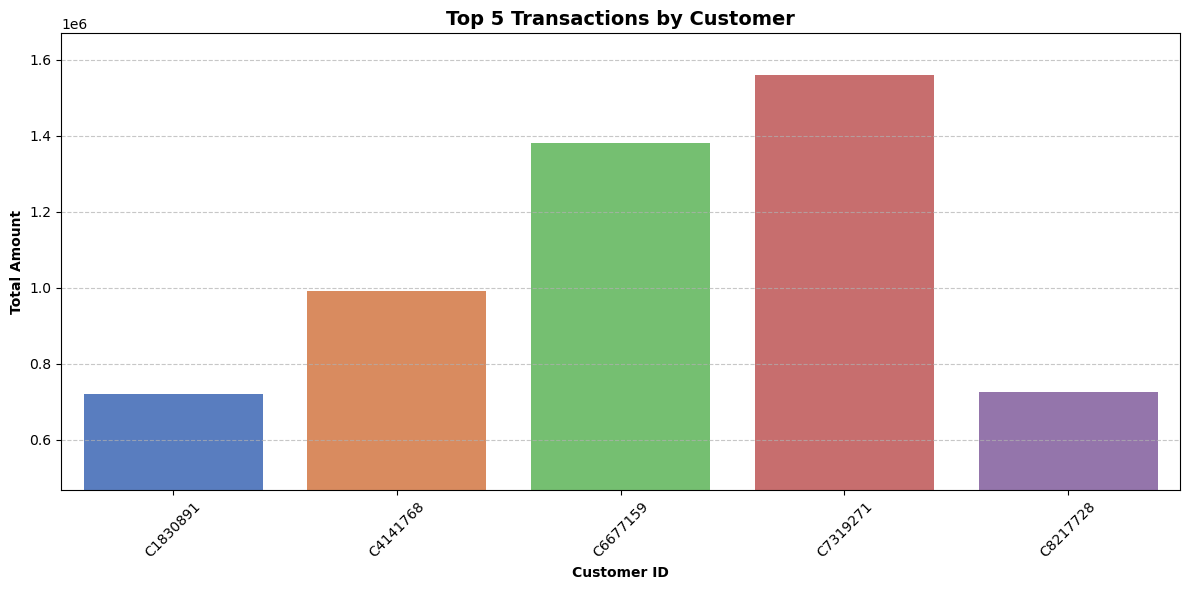

In [154]:
cus_count = df.groupby('CustomerID')['TransactionAmount (INR)'].sum().reset_index()

# Get top N customers by transaction amount
cus_n = 5
cus_transaction_count = cus_count.sort_values(by='TransactionAmount (INR)', ascending=False).head(cus_n)

# Sort again by CustomerID for consistent bar order
cus_transaction_count = cus_transaction_count.sort_values('CustomerID')

# Create the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(
    x='CustomerID',
    y='TransactionAmount (INR)',
    data=cus_transaction_count,
    palette='muted'
)

# Titles and labels
plt.title(f"Top {cus_n} Transactions by Customer", fontsize=14, fontweight='bold')
plt.xlabel("Customer ID", fontweight='bold')
plt.ylabel("Total Amount", fontweight='bold')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust y-axis limits for better visual spacing
plt.ylim(
    cus_transaction_count['TransactionAmount (INR)'].min() * 0.65,
    cus_transaction_count['TransactionAmount (INR)'].max() * 1.07
)

# Layout fix
plt.tight_layout()
plt.show()


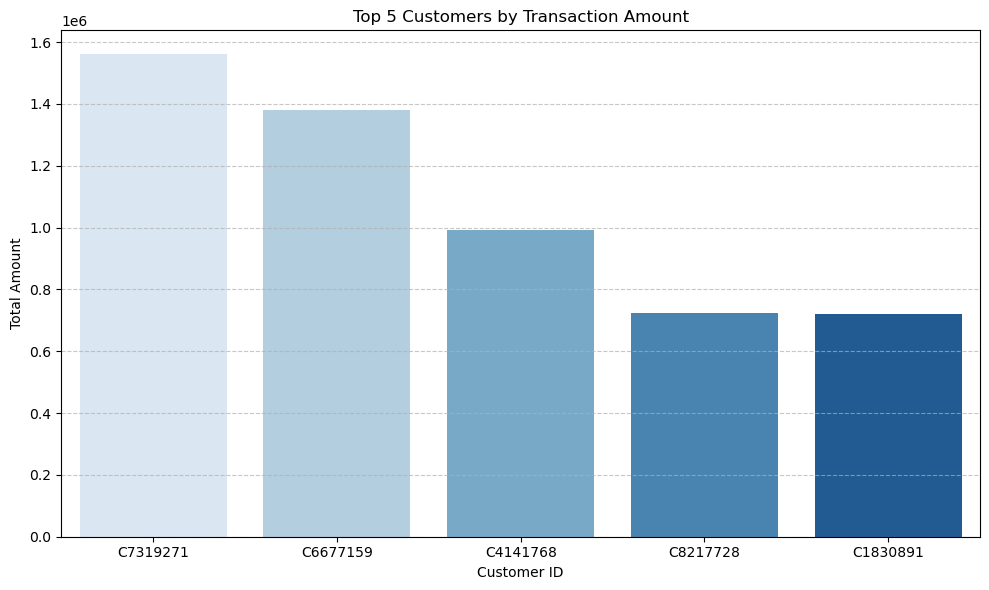

In [166]:
top_customers = df.groupby('CustomerID')['TransactionAmount (INR)'].sum().nlargest(5).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=top_customers, x='CustomerID', y='TransactionAmount (INR)', palette='Blues')
plt.title('Top 5 Customers by Transaction Amount')
plt.xlabel('Customer ID')
plt.ylabel('Total Amount')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [113]:
df['Age'].unique()

array([22, 59, 20, 43, 28, 44, 24, 34, 32, 38, 48, 31, 27, 25, 23, 30, 49,
       37, 39, 19, 33, 26, 36, 35, 50, 29, 41, 21, 42, 45, 84, 57, 17, 51,
       75, 62, 46, 40, 95, 47, 12, 73, 18, 65, 56, 60, 63, 69, 16, 52, 68,
       54, 64, 61, 55, 80, 53, 74, 72, 78, 67, 58, 66, 70, 14, 71, 79,  9,
       15, 77, 76,  3, 13, 11,  6,  5, 83, 82, 89, 97, 88, 86,  7, 85, 87,
       81,  1,  0, 10,  8,  4, 93, 90, 92, 94,  2, 96, 91, 98],
      dtype=int64)

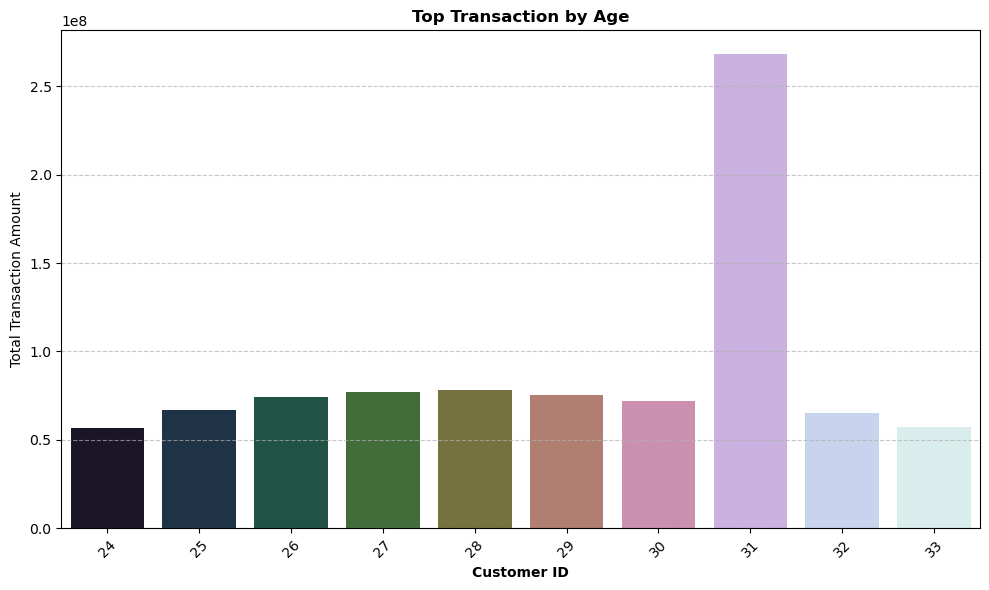

In [146]:
customer_sales = df.groupby('Age')['TransactionAmount (INR)'].sum().sort_values(ascending=False).head(10).reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=customer_sales, x='Age', y='TransactionAmount (INR)', palette='cubehelix')
plt.title('Top Transaction by Age', fontweight = 'bold')
plt.xlabel('Customer ID', fontweight = 'bold')
plt.ylabel('Total Transaction Amount')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


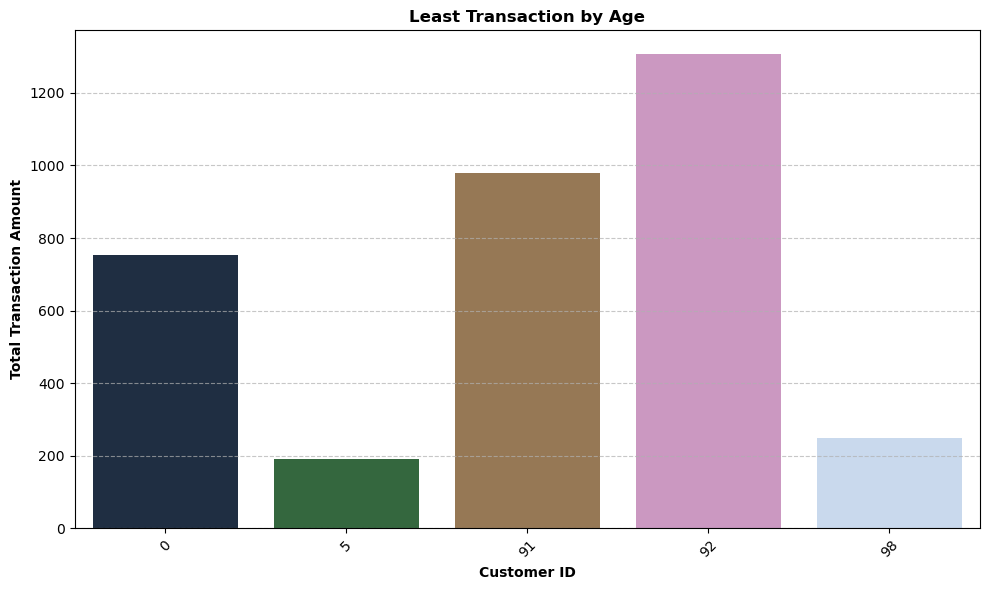

In [145]:
customer_sales = df.groupby('Age')['TransactionAmount (INR)'].sum().sort_values(ascending=False).tail(5).reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=customer_sales, x='Age', y='TransactionAmount (INR)', palette='cubehelix')
plt.title('Least Transaction by Age', fontweight = 'bold')
plt.xlabel('Customer ID', fontweight = 'bold')
plt.ylabel('Total Transaction Amount', fontweight = 'bold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


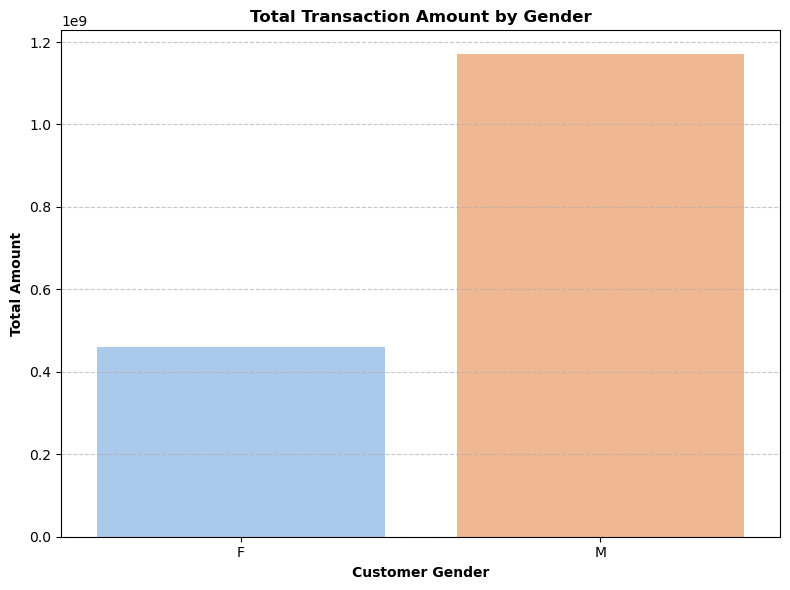

In [135]:
customer_sales = df.groupby('CustGender')['TransactionAmount (INR)'].sum().reset_index()

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(data=customer_sales, x='CustGender', y='TransactionAmount (INR)', palette='pastel')
plt.title('Total Transaction Amount by Gender', fontweight = 'bold')
plt.xlabel('Customer Gender', fontweight = 'bold')
plt.ylabel('Total Amount', fontweight = 'bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




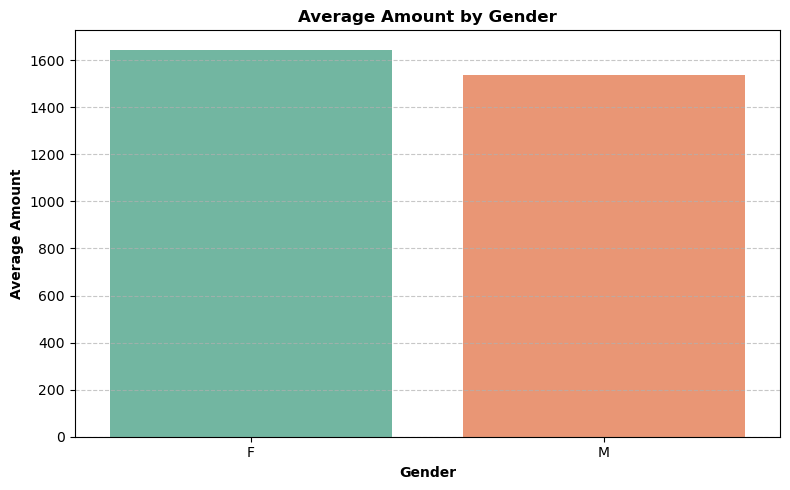

In [160]:
plt.figure(figsize=(8, 5))
sns.barplot(
    data=df.groupby('CustGender')['TransactionAmount (INR)'].mean().reset_index(),
    x='CustGender',
    y='TransactionAmount (INR)',
    palette='Set2'
)
plt.title("Average Amount by Gender", fontweight ='bold')
plt.xlabel("Gender", fontweight ='bold')
plt.ylabel("Average Amount", fontweight ='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


 ## sns.barplot(data=customer_sales, x='CustGender', y='TransactionAmount (INR)', palette='pastel')


Seaborn Built-in Palettes:
'pastel' – soft, light colors

'deep' – default Seaborn colors

'muted' – toned-down shades

'bright' – vibrant and distinct

'dark' – rich, bold colors

'colorblind' – colorblind-safe palette

🔥 Some visually appealing ones:
'rocket' – deep red to light pink

'mako' – dark blue to light teal

'cubehelix' – perceptually uniform grayscale

'coolwarm' – blue to red gradient (for diverging values)

'flare', 'crest', 'twilight', 'ch:s*3,rot=-.5' – for creative gradients 




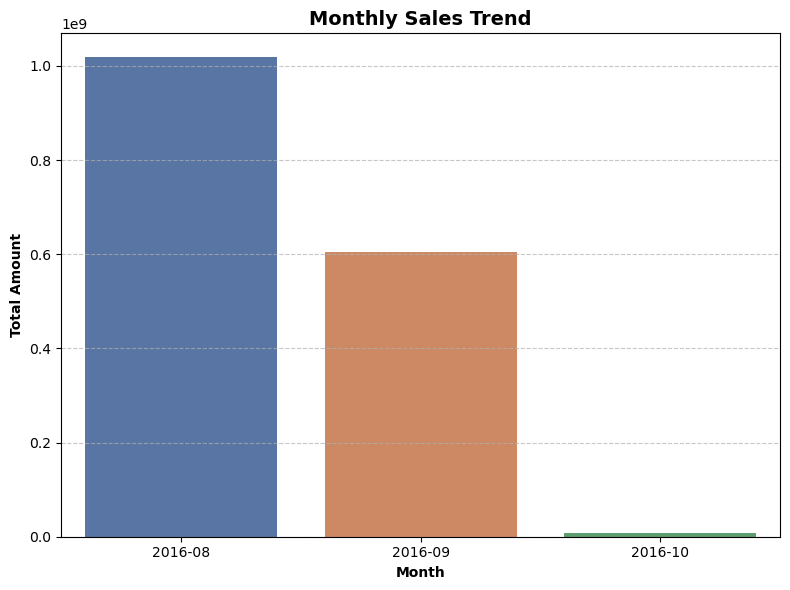

In [143]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

# Extract Year-Month
df['Month'] = df['TransactionDate'].dt.to_period('M').astype(str)

# Group by Month and sum TransactionAmount
monthly_sales = df.groupby('Month')['TransactionAmount (INR)'].sum().reset_index()

# Plot bar chart
plt.figure(figsize=(8, 6))
sns.barplot(data=monthly_sales, x='Month', y='TransactionAmount (INR)', palette='deep')

# Customize plot
plt.title('Monthly Sales Trend', fontsize=14, fontweight = 'bold')
plt.xlabel('Month', fontweight = 'bold')
plt.ylabel('Total Amount', fontweight = 'bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


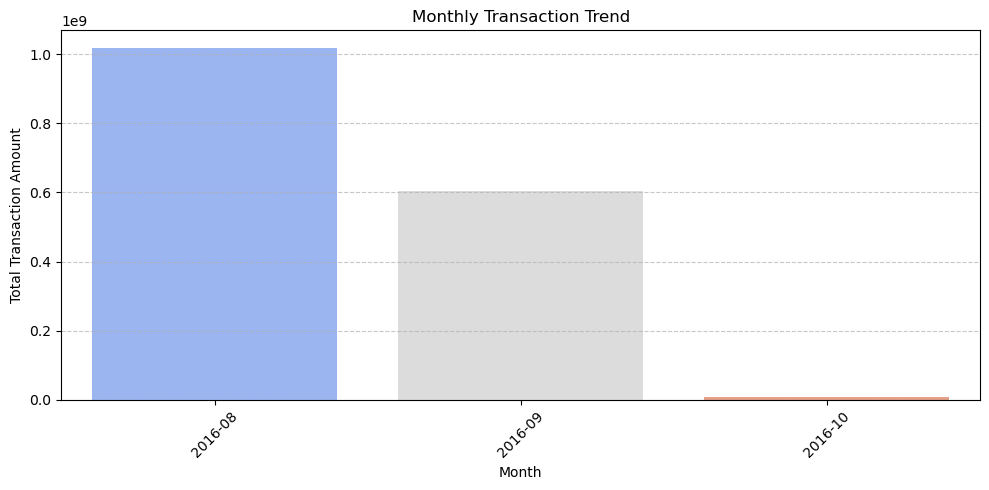

In [167]:
# Convert date column
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], dayfirst=True)

# Group by month
df['Month'] = df['TransactionDate'].dt.to_period('M').astype(str)
monthly_sales = df.groupby('Month')['TransactionAmount (INR)'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=monthly_sales, x='Month', y='TransactionAmount (INR)', palette='coolwarm')
plt.title('Monthly Transaction Trend')
plt.xlabel('Month')
plt.ylabel('Total Transaction Amount')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

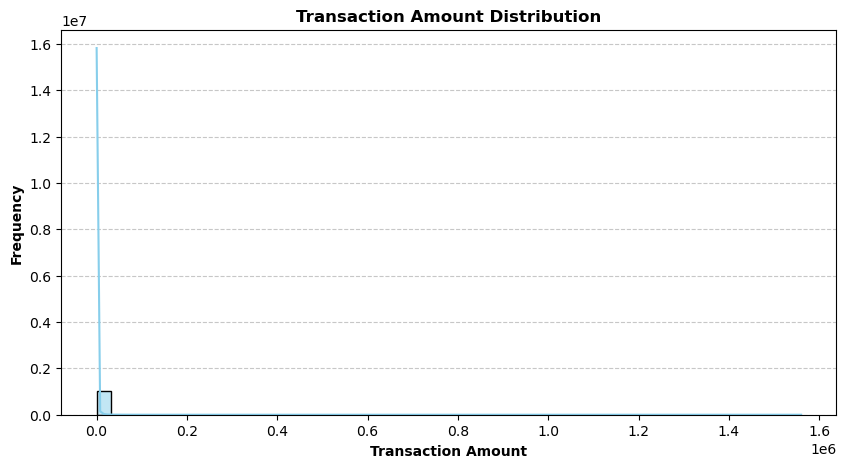

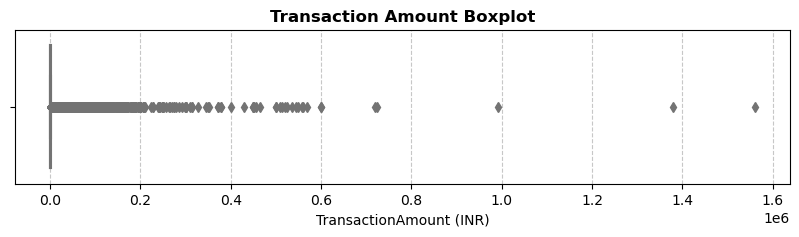

In [161]:

# Histogram
plt.figure(figsize=(10, 5))
sns.histplot(df['TransactionAmount (INR)'], bins=50, kde=True, color='skyblue')
plt.title('Transaction Amount Distribution', fontweight ='bold')
plt.xlabel('Transaction Amount', fontweight ='bold')
plt.ylabel('Frequency', fontweight ='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Boxplot to visualize outliers
plt.figure(figsize=(10, 2))
sns.boxplot(x=df['TransactionAmount (INR)'], color='lightgreen')
plt.title('Transaction Amount Boxplot', fontweight = 'bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


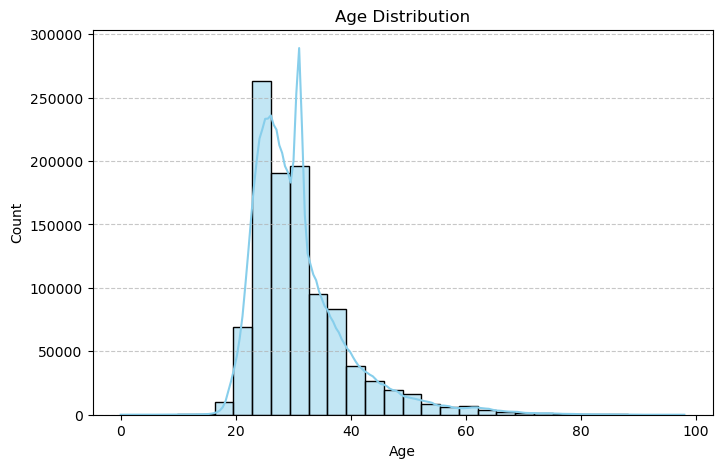

In [162]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



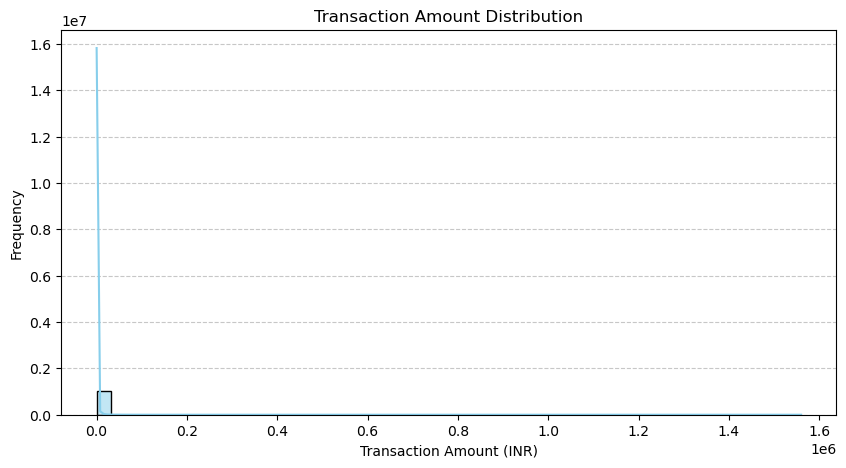

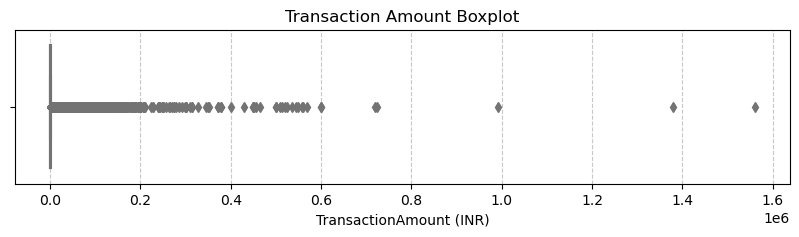

In [163]:
plt.figure(figsize=(10, 5))
sns.histplot(df['TransactionAmount (INR)'], bins=50, kde=True, color='skyblue')
plt.title('Transaction Amount Distribution')
plt.xlabel('Transaction Amount (INR)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Boxplot for outliers
plt.figure(figsize=(10, 2))
sns.boxplot(x=df['TransactionAmount (INR)'], color='lightgreen')
plt.title('Transaction Amount Boxplot')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


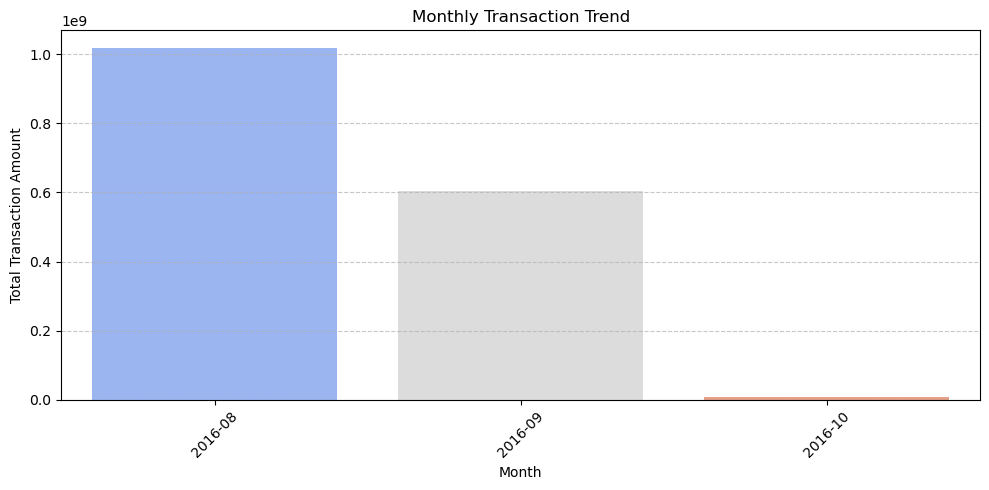

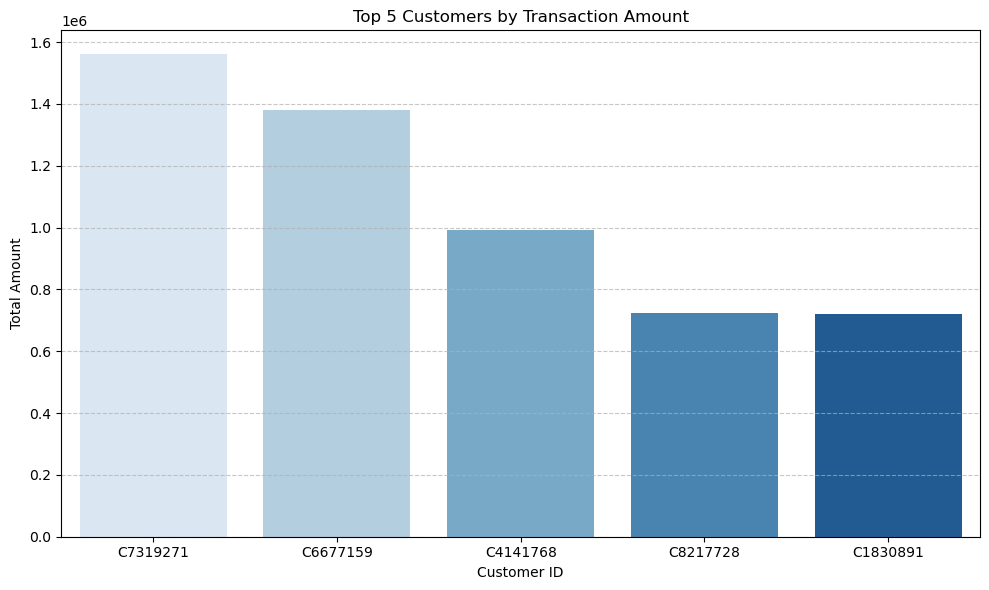